# Лабораторная работа 1
## Вариант 25

Ozone Level Detection Data Set

`eighthr.data`

http://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection

# 1. скачать датасет

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ozone_level_detection = fetch_ucirepo(id=172)

In [2]:
original = ozone_level_detection['data']['original']

In [3]:
o8hr = original[original['Dataset'] == '8hr']

In [4]:
o8hr

,Dataset,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Class
0,8hr,1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0
1,8hr,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0
2,8hr,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0
3,8hr,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0
4,8hr,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,8hr,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,...,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00,0
2530,8hr,12/28/2004,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,...,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00,0
2531,8hr,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,...,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00,0
2532,8hr,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,...,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05,0


# 2. определить числовые признаки
Из видимых данных и названия признаков кажется, что все признаки кроме `Date` и `Class` -- числовые, а последний является категориальным.
Это можно проверить, посмотрев на количество уникальных значений в колонках.

In [5]:
for label in list(o8hr):
    print(f"{label = }, {len(set(o8hr[label])) = }")

label = 'Dataset', len(set(o8hr[label])) = 1
label = 'Date', len(set(o8hr[label])) = 2534
label = 'WSR0', len(set(o8hr[label])) = 367
label = 'WSR1', len(set(o8hr[label])) = 362
label = 'WSR2', len(set(o8hr[label])) = 359
label = 'WSR3', len(set(o8hr[label])) = 358
label = 'WSR4', len(set(o8hr[label])) = 357
label = 'WSR5', len(set(o8hr[label])) = 355
label = 'WSR6', len(set(o8hr[label])) = 357
label = 'WSR7', len(set(o8hr[label])) = 356
label = 'WSR8', len(set(o8hr[label])) = 359
label = 'WSR9', len(set(o8hr[label])) = 357
label = 'WSR10', len(set(o8hr[label])) = 364
label = 'WSR11', len(set(o8hr[label])) = 369
label = 'WSR12', len(set(o8hr[label])) = 364
label = 'WSR13', len(set(o8hr[label])) = 366
label = 'WSR14', len(set(o8hr[label])) = 365
label = 'WSR15', len(set(o8hr[label])) = 364
label = 'WSR16', len(set(o8hr[label])) = 356
label = 'WSR17', len(set(o8hr[label])) = 356
label = 'WSR18', len(set(o8hr[label])) = 356
label = 'WSR19', len(set(o8hr[label])) = 357
label = 'WSR20', len

Учитывая, что в признаке `Class` существуют только два разных значения, а во всех остальных признаках -- больше сотни, то, действительно, этот один признак является категориальным, а остальные -- числовыми.

Заменим значения NaN медианными значениями по своим колонкам.

In [6]:
sum(o8hr['SLP'].isna())

95

In [7]:
import warnings
with warnings.catch_warnings(action="ignore"):
    for label in list(o8hr):
        try:
            med = o8hr[label].median()
        except:
            print(f"{label=} no median")
            continue
        nans = sum(o8hr[label].isna())
        o8hr[label] = o8hr[label].fillna(med)
        print(f"{label=} filled {nans} cells with {med}")

label='Dataset' no median
label='Date' no median
label='WSR0' filled 299 cells with 1.3
label='WSR1' filled 292 cells with 1.3
label='WSR2' filled 294 cells with 1.2
label='WSR3' filled 292 cells with 1.3
label='WSR4' filled 293 cells with 1.3
label='WSR5' filled 292 cells with 1.3
label='WSR6' filled 291 cells with 1.4
label='WSR7' filled 289 cells with 1.9
label='WSR8' filled 290 cells with 2.5
label='WSR9' filled 287 cells with 2.8
label='WSR10' filled 288 cells with 2.9
label='WSR11' filled 292 cells with 2.9
label='WSR12' filled 287 cells with 3.0
label='WSR13' filled 288 cells with 3.0
label='WSR14' filled 288 cells with 3.1
label='WSR15' filled 286 cells with 3.2
label='WSR16' filled 284 cells with 3.2
label='WSR17' filled 283 cells with 2.9
label='WSR18' filled 286 cells with 2.5
label='WSR19' filled 292 cells with 2.2
label='WSR20' filled 294 cells with 2.0
label='WSR21' filled 293 cells with 1.7
label='WSR22' filled 300 cells with 1.6
label='WSR23' filled 297 cells with 1.4
l

# 3. метка класса
Уже определили, что метка класса -- это признак `Class`, который принимает 2 значения, поэтому дискретизация не требуется.

In [8]:
del o8hr['Dataset']

In [9]:
numerics = set(o8hr) - set(["Date", "Class"])
numerics = list(numerics)
numerics

['SLP_',
 'V85',
 'WSR8',
 'T2',
 'WSR_PK',
 'U70',
 'U50',
 'WSR1',
 'WSR5',
 'T3',
 'WSR4',
 'T7',
 'WSR9',
 'WSR22',
 'T1',
 'T8',
 'WSR14',
 'WSR_AV',
 'T14',
 'T22',
 'WSR10',
 'WSR23',
 'T5',
 'RH70',
 'T70',
 'WSR21',
 'T0',
 'T15',
 'T16',
 'WSR2',
 'WSR19',
 'T_PK',
 'TT',
 'WSR18',
 'WSR7',
 'T18',
 'WSR13',
 'WSR3',
 'T17',
 'T50',
 'T19',
 'WSR11',
 'WSR0',
 'T85',
 'V50',
 'WSR16',
 'HT50',
 'Precp',
 'V70',
 'T20',
 'U85',
 'T9',
 'RH85',
 'HT70',
 'WSR6',
 'WSR17',
 'T_AV',
 'T10',
 'T4',
 'T23',
 'KI',
 'T13',
 'WSR12',
 'T21',
 'WSR20',
 'HT85',
 'WSR15',
 'T12',
 'T6',
 'T11',
 'SLP',
 'RH50']

# 4. признаки с макс. взаимосвязью

In [10]:
import sklearn.feature_selection
klass = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.f_classif, k=2)

In [11]:
klass.fit(o8hr[numerics], o8hr['Class'])

SelectKBest(k=2)

In [12]:
high_corr = klass.get_feature_names_out()
high_corr

array(['T15', 'T16'], dtype=object)

# 5. матрица корреляции

In [13]:
corr_in = o8hr[list(high_corr) + ["Class"]]

In [14]:
corr_mat = corr_in.corr()

In [15]:
corr_mat.style.background_gradient(cmap='Blues')

,T15,T16,Class
T15,1.000000,0.993745,0.251189
T16,0.993745,1.000000,0.249164
Class,0.251189,0.249164,1.000000


# 6. визуализация данных

In [16]:
visdata = o8hr[list(high_corr) + ["Class"]]

<Axes: xlabel='T15', ylabel='T16'>

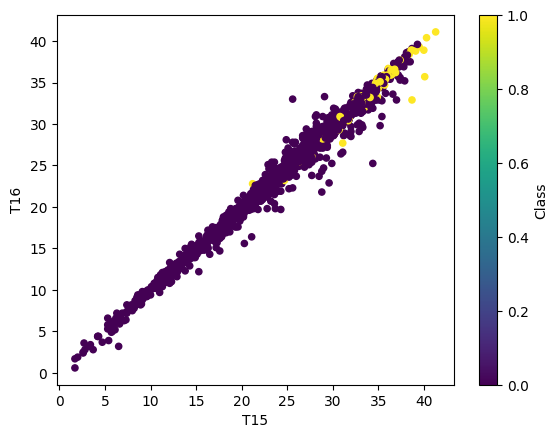

In [17]:
visdata.plot.scatter(high_corr[0], high_corr[1], c='Class', cmap='viridis')

# 7. метод главных компонент: размерность

In [18]:
from sklearn.decomposition import PCA

In [19]:
explained_ratio = 0
n = -1
while explained_ratio < 0.975:
    n += 1
    p = PCA(n_components=n)
    p.fit(o8hr[numerics])
    explained_ratio = sum(p.explained_variance_ratio_)
    print(f"{n=} {explained_ratio=}")
print("необходимая размерность:", n)

n=0 explained_ratio=0
n=1 explained_ratio=np.float64(0.6168094803096759)
n=2 explained_ratio=np.float64(0.8671047959110844)
n=3 explained_ratio=np.float64(0.9331933895444452)
n=4 explained_ratio=np.float64(0.9562651425610382)
n=5 explained_ratio=np.float64(0.976587708029945)
необходимая размерность: 5


# 8. метод главных компонент: сжатие и визуализация

In [20]:
p = PCA(n_components=2)
coords = p.fit_transform(o8hr[numerics])

In [21]:
coords

array([[  5.34385419, 175.30488734],
       [ 14.62103152, 108.23753092],
       [ -8.33647694,  66.94707866],
       ...,
       [ 47.66417271, 113.22842784],
       [ 42.55531334,  83.36474789],
       [ 13.16492786,  53.88670953]])

In [22]:
xs = coords[:, 0]
ys = coords[:, 1]

In [23]:
import matplotlib
from matplotlib import pyplot as pyplt

Using matplotlib backend: module://matplotlib_inline.backend_inline


Text(0, 0.5, 'Ys: 0.2502953156014085')

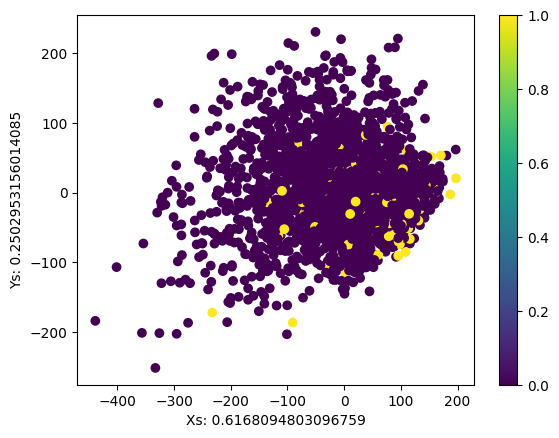

In [24]:
%matplotlib
pyplt.scatter(xs, ys, c=o8hr['Class'])
pyplt.colorbar()
pyplt.xlabel(f"Xs: {p.explained_variance_ratio_[0]}")
pyplt.ylabel(f"Ys: {p.explained_variance_ratio_[1]}")